## Group No 46

## Group Member Names:
1. Satya Prakash Pandit - 2022AC05040 
2. Pushkar Kumar Verma – 2022AC05272 
3. G Krishna Sameera – 2022AC05407


## Journal used for the implemetation
Journal title:Proposal of a model for credit risk prediction based on deep learning methods and SMOTE techniques for imbalanced dataset

Authors:Adaleta Gicić - Engineering Faculty, University of Sarajevo, Bosnia and Herzegovina
Dženana Ðonko - Engineering Faculty, University of Sarajevo, Bosnia and Herzegovina

Journal Name:The architecture of the deep learning models discussed in the paper involves Stacked LSTM and Stacked BiLSTM networks:
Number of Layers: Both Stacked LSTM and Stacked BiLSTM architectures consist of three hidden layers.

Year:2021

# 1. Import the required libraries

In [1]:
##---------Type the code below this line------------------##
import numpy as np
import pandas as pd
import seaborn as sn
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout

In [2]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of 
                        # numbers will appear every time. 
tf.random.set_seed(42)  # sets the graph-level random seed

# 2. Data Acquisition

For the problem identified by you, students have to find the data source themselves from any data source.

Provide the URL of the data used.

Write Code for converting the above downloaded data into a form suitable for DL

URL for data : 
https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data


In [3]:
##---------Type the code below this line------------------##
##Load the original dataset :
data1=pd.read_csv('german.data',header = None,delim_whitespace = True)
data1.head()
#assigning columns names to data varible
data1.columns = ["chek_acc","mon","credit_his","purpose","Credit_amo","saving_amo","Pre_employ","instalrate","p_status","guatan","pre_res","property","age","installment","Housing","existing_cards","job","no_people","telephn","for_work","status"]
data1.head()
# Identify NULL or Missing Values
missing_values = data1.isnull().sum()
print("Missing Values:")
print(missing_values)
# Handle Missing Values
df = data1.dropna()  # Drop rows with missing values


Missing Values:
chek_acc          0
mon               0
credit_his        0
purpose           0
Credit_amo        0
saving_amo        0
Pre_employ        0
instalrate        0
p_status          0
guatan            0
pre_res           0
property          0
age               0
installment       0
Housing           0
existing_cards    0
job               0
no_people         0
telephn           0
for_work          0
status            0
dtype: int64


In [4]:
data1.describe()

,mon,Credit_amo,instalrate,pre_res,age,existing_cards,no_people,status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [5]:
##Loading the dataset numeric
data2=pd.read_csv('german.data-numeric',header = None,delim_whitespace = True)
data2.head()
#assigning columns names to data varible
data2.columns = ["chek_acc","mon","credit_his","purpose","Credit_amo","saving_amo","Pre_employ","instalrate","p_status","guatan","pre_res","property","age","installment","Housing","existing_cards","job","no_people","telephn","for_work","a","b","c","d","status"]
data2.head()

,chek_acc,mon,credit_his,purpose,Credit_amo,saving_amo,Pre_employ,instalrate,p_status,guatan,...,existing_cards,job,no_people,telephn,for_work,a,b,c,d,status
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


# 3. Data Preparation

Perform the data prepracessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

In [6]:
#load the dataset

##pre process the data
X = data2.drop('status', axis=1)  # Replace 'target_variable' with your actual target variable
##to make output value  binary represenations 0-good 1-bad
y = data2['status']-1
type(data2)


pandas.core.frame.DataFrame

In [7]:
X.head()
y.head()

0    0
1    1
2    0
3    0
4    1
Name: status, dtype: int64

In [8]:
##---------Type the code below this line------------------##

## Split the data into training set and testing set
##---------Type the code below this line------------------##
# Splitting the dataset for training and testing the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Let us check shape of the training & test set
print(X_train.shape, y_test.shape)
## Identify the target variables.
##---------Type the code below this line------------------##
#created histogram for credit amount

#sn.distplot( data2.Credit_amo, kde = False )
#plt.title( "Histogram of Credit Amount ", fontsize = 15)
#plt.ylabel( "Frequency")
#created pairplot to view data  

#sn.pairplot(data2)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



(800, 24) (200,)


Text(0.5, 1.0, 'Correlation Matrix')

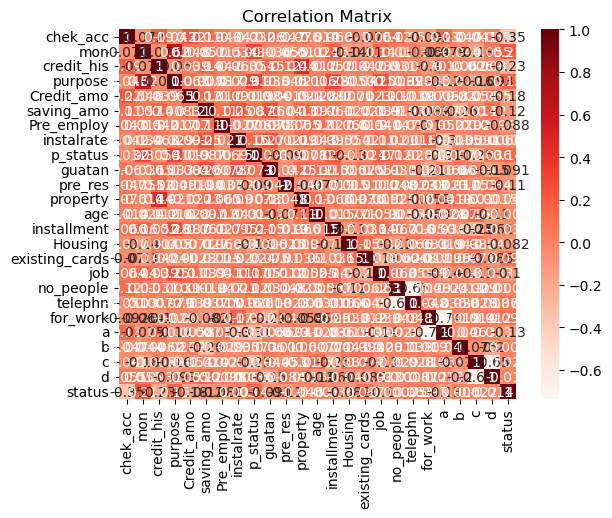

In [9]:
##Draw a a correlation matrix
sn.heatmap(data2.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')


Feature Representation for Training the Model:
Index(['chek_acc', 'mon', 'credit_his', 'purpose', 'Credit_amo', 'saving_amo',
       'Pre_employ', 'instalrate', 'p_status', 'guatan', 'pre_res', 'property',
       'age', 'installment', 'Housing', 'existing_cards', 'job', 'no_people',
       'telephn', 'for_work', 'a', 'b', 'c', 'd'],
      dtype='object')


Text(0.5, 1.0, 'Correlation Matrix')

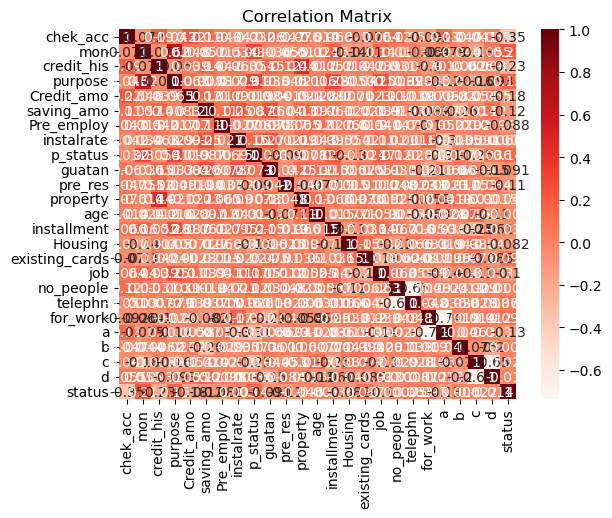

In [10]:
## Display the feature representation being used for training the model
print("Feature Representation for Training the Model:")
print(X_train.columns)
##Draw a a correlation matrix
sn.heatmap(data2.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

## 4. Deep Neural Network Architecture
# Create a model object

dnnModel = models.Sequential()

## 4.1 Design the architecture that you will be using

* CNN / RNN / Transformer as per the journal referenced



In [11]:
##---------Type the code below this line------------------##
dnnModel = models.Sequential()
# Apply SMOTE to address class imbalance
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Reshape the data for LSTM models
X_train_reshaped = X_train_resampled.reshape((X_train_resampled.shape[0], 1, X_train_resampled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build Stacked LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(60, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True))
model_lstm.add(LSTM(80, activation='relu', return_sequences=True))
model_lstm.add(LSTM(120, activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid'))


# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the model
accuracy_lstm_train = model_lstm.evaluate(X_train_reshaped, y_train_resampled)[1]
accuracy_lstm_test = model_lstm.evaluate(X_test_reshaped, y_test)[1]
model_lstm.summary()
print(f"Training Accuracy (Stacked LSTM): {accuracy_lstm_train}")
print(f"Testing Accuracy (Stacked LSTM): {accuracy_lstm_test}")

7/7 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.3800
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 60)             20400     
                                                                 
 lstm_1 (LSTM)               (None, 1, 80)             45120     
                                                                 
 lstm_2 (LSTM)               (None, 120)               96480     
                                                                 
 dense (Dense)               (None, 1)                 121       
                                                                 
Total params: 162121 (633.29 KB)
Trainable params: 162121 (633.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Training Accuracy (Stacked LSTM): 0.43291592597961426
Testing

## 4.2 DNN Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer
* Total number of trainable parameters



# 5. Training the model


In [12]:
# Configure the training, by using appropriate optimizers, regularizations and loss functions
##---------Type the code below this line------------------##
# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history=model_lstm.fit(X_train_reshaped, y_train_resampled, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
28/28 [==============================] - 8s 44ms/step - loss: 0.6879 - accuracy: 0.6141 - val_loss: 0.7422 - val_accuracy: 0.0000e+00
Epoch 2/50
28/28 [==============================] - 0s 18ms/step - loss: 0.6534 - accuracy: 0.6253 - val_loss: 0.9112 - val_accuracy: 0.0000e+00
Epoch 3/50
28/28 [==============================] - 0s 14ms/step - loss: 0.5638 - accuracy: 0.6253 - val_loss: 0.9180 - val_accuracy: 0.0045
Epoch 4/50
28/28 [==============================] - 0s 17ms/step - loss: 0.5137 - accuracy: 0.6957 - val_loss: 0.8266 - val_accuracy: 0.6205
Epoch 5/50
28/28 [==============================] - 0s 11ms/step - loss: 0.4859 - accuracy: 0.7752 - val_loss: 0.7483 - val_accuracy: 0.7277
Epoch 6/50
28/28 [==============================] - 0s 10ms/step - loss: 0.4571 - accuracy: 0.7919 - val_loss: 0.5911 - val_accuracy: 0.8036
Epoch 7/50
28/28 [==============================] - 0s 11ms/step - loss: 0.4350 - accuracy: 0.7886 - val_loss: 0.5163 - val_accuracy: 0.8036
Epoch

# 6. Test the model


In [13]:
##---------Type the code below this line------------------##
# Evaluate the model
accuracy_lstm_train = model_lstm.evaluate(X_train_reshaped, y_train_resampled)[1]
accuracy_lstm_test = model_lstm.evaluate(X_test_reshaped, y_test)[1]


7/7 [==============================] - 0s 5ms/step - loss: 3.1874 - accuracy: 0.7400


# 7. Report the result

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


In [14]:
##---------Type the code below this line------------------##
model_lstm.summary()
print(f"Training Accuracy (Stacked LSTM): {accuracy_lstm_train}")
print(f"Testing Accuracy (Stacked LSTM): {accuracy_lstm_test}")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 60)             20400     
                                                                 
 lstm_1 (LSTM)               (None, 1, 80)             45120     
                                                                 
 lstm_2 (LSTM)               (None, 120)               96480     
                                                                 
 dense (Dense)               (None, 1)                 121       
                                                                 
Total params: 162121 (633.29 KB)
Trainable params: 162121 (633.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Training Accuracy (Stacked LSTM): 0.9883720874786377
Testing Accuracy (Stacked LSTM): 0.7400000095367432


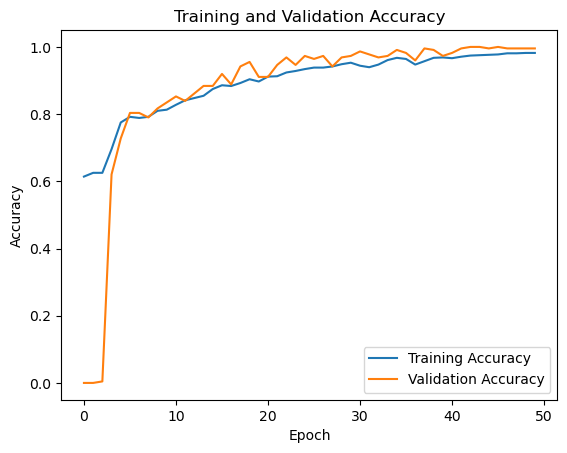

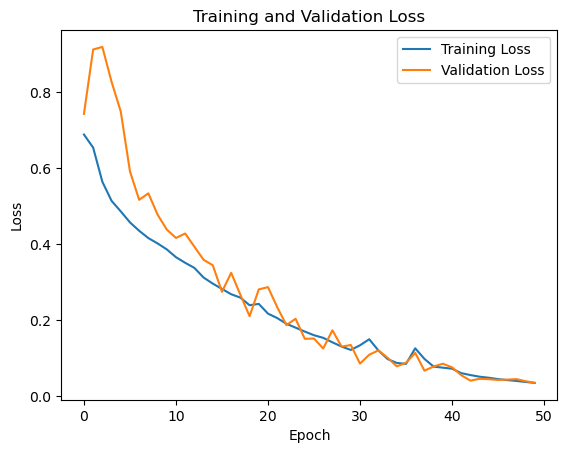

Testing Accuracy: 74.00%
7/7 [==============================] - 0s 3ms/step - loss: 3.1874 - accuracy: 0.7400
Testing Loss: 3.1874


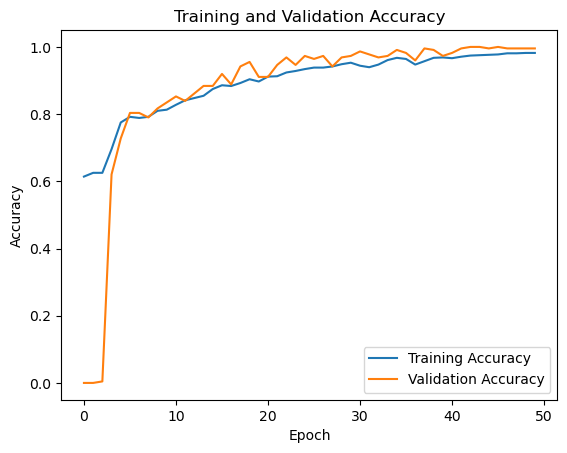

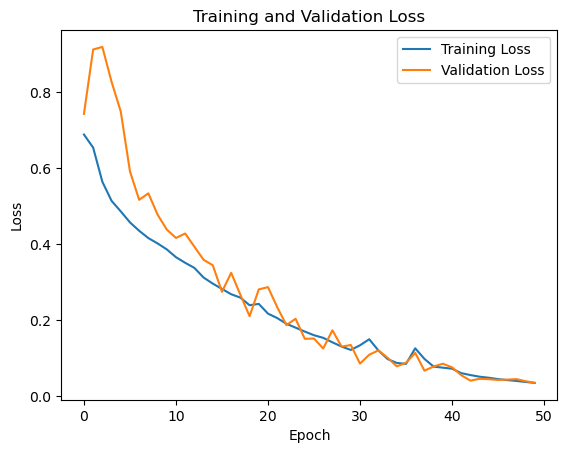

7/7 [==============================] - 0s 3ms/step


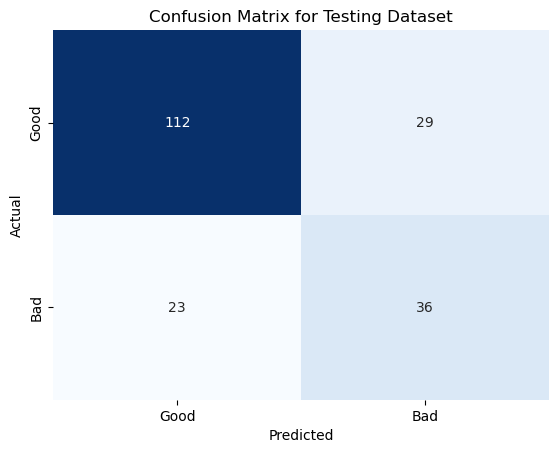

Performance Study Metrics:
              precision    recall  f1-score   support

        Good       0.83      0.79      0.81       141
         Bad       0.55      0.61      0.58        59

    accuracy                           0.74       200
   macro avg       0.69      0.70      0.70       200
weighted avg       0.75      0.74      0.74       200



In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Train the model and store the history
#history = model_lstm.fit(X_train_reshaped, y_train_resampled, epochs=50, batch_size=32, validation_split=0.2)
# Plot the training and validation accuracy history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Report the result
print("Testing Accuracy: {:.2f}%".format(accuracy_lstm_test * 100))
print("Testing Loss: {:.4f}".format(model_lstm.evaluate(X_test_reshaped, y_test)[0]))

# Plot the training and validation accuracy history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Assuming binary classification
threshold = 0.5  # Adjust this threshold based on your needs

# Obtain binary predictions based on the threshold
y_pred_binary = (model_lstm.predict(X_test_reshaped) > threshold).astype(int)

# Confusion Matrix for testing dataset
conf_matrix = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
plt.title('Confusion Matrix for Testing Dataset')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Performance Study Metrics
classification_rep = classification_report(y_test, y_pred_binary, target_names=['Good', 'Bad'])
print("Performance Study Metrics:")
print(classification_rep)



### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck